In [1]:
import networkx as nx

In [3]:
import matplotlib

In [4]:
matplotlib.rcParams['xtick.labelsize']=18
matplotlib.rcParams['ytick.labelsize']=18
import matplotlib.pyplot as plt
import pylab

In [5]:
%matplotlib inline
pylab.rcParams['figure.figsize']=8,8
from collections import defaultdict

In [11]:
G = nx.read_edgelist("1.graph.txt")

In [13]:
from collections import Counter
degrees = Counter(dict(nx.degree(G)).values())
sorted_degree_values = sorted(degrees.keys())
counts = [degrees[d] for d in sorted_degree_values]

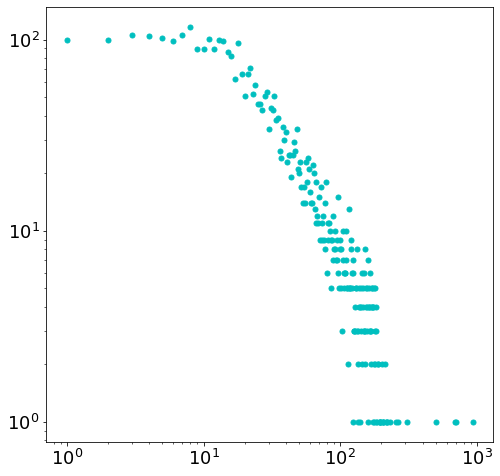

In [15]:
plt.loglog(sorted_degree_values, counts, ls='None', marker='.', markersize=10, color='c')
plt.show()

In [17]:
from scipy.optimize import curve_fit
import numpy as np

In [28]:
def func(d, c, gamma):
        return float (c)/(d ** gamma)

h1, h2 = 8, 250

In [29]:
xdata = np.array(sorted_degree_values[h1:h2])
ydata = np.array(counts[h1:h2])
popt, pcov = curve_fit(func, xdata, ydata)
c, gamma = popt
print(c, gamma)

1239.166990897887 1.0367437504776456


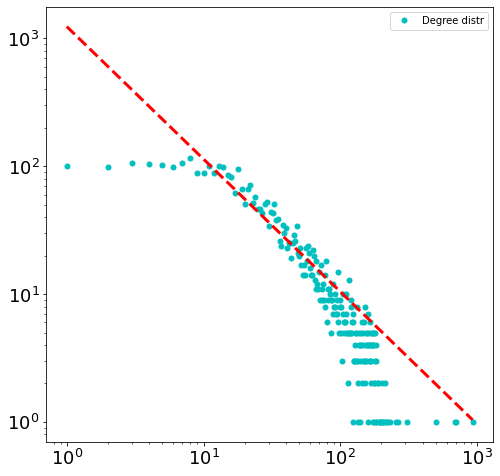

In [30]:
plt.loglog(sorted_degree_values, counts, ls='None', marker='.', markersize=10, color='c', label='Degree distr')
estimated = [func(d, c, gamma) for d in sorted_degree_values]
plt.loglog(sorted_degree_values, estimated, ls='--', color='r', linewidth=3)
plt.legend()
plt.show()